**Task 1: Data Understanding and Importing**

In [41]:
import pandas as pd

# importing the data
df = pd.read_csv('data.csv')

print(df.head(10))

print(df.info())


print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


print(df.describe())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   
5   6    50000.0    1          1         2   37      0      0      0      0   
6   7   500000.0    1          1         2   29      0      0      0      0   
7   8   100000.0    2          2         2   23      0     -1     -1      0   
8   9   140000.0    2          3         1   28      0      0      2      0   
9  10    20000.0    1          3         2   35     -2     -2     -2     -2   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689

**Task 2: Handling Missing Data**

In [48]:
missing_values = df.isnull().sum()
# printing missing value
print(missing_values[missing_values > 0])


df_cleaned = df.dropna()

df.fillna(df.mean(), inplace=True)

print(df.isnull().sum())


Series([], dtype: int64)
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
LIMIT_BAL_scaled              0
AGE_normalized                0
dtype: int64


Task 3: Data Transformation

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'LIMIT_BAL_scaled', 'AGE_normalized'],
      dtype='object')


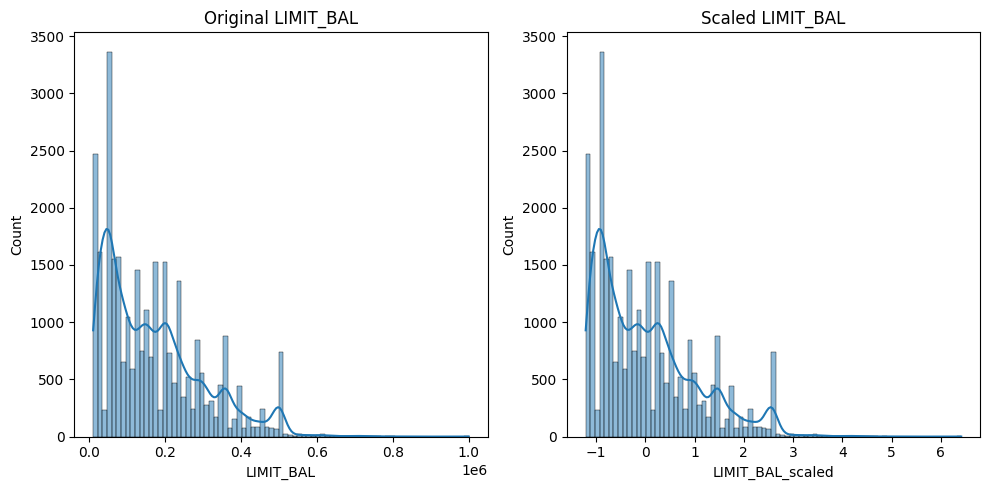

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns
print(continuous_vars)


scaler = StandardScaler()
df['LIMIT_BAL_scaled'] = scaler.fit_transform(df[['LIMIT_BAL']])


min_max_scaler = MinMaxScaler()
df['AGE_normalized'] = min_max_scaler.fit_transform(df[['AGE']])


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title('Original LIMIT_BAL')

plt.subplot(1, 2, 2)
sns.histplot(df['LIMIT_BAL_scaled'], kde=True)
plt.title('Scaled LIMIT_BAL')

plt.tight_layout()
plt.show()



**Task 4: Encoding categorical variables**

In [50]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")


df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the encoded data
print(df_encoded.head())


Categorical columns: Index([], dtype='object')
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0  ...        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1  ...     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2  ...    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3  ...    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4  ...    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     6

**Task 5: Feature Selection and Engineering**

In [51]:
if 'ID' in df_encoded.columns:
    df_encoded.drop(['ID'], axis=1, inplace=True)

df_encoded['total_payment'] = df_encoded['BILL_AMT1'] + df_encoded['PAY_AMT1']

# Check the new feature
print(df_encoded.head())


   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     -2  ...       0.0     689.0       0.0       0.0       0.0       0.0   
1      0  ...       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2      0  ...    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3      0  ...    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4      0  ...    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  LIMIT_BAL_scaled  AGE_normalized  total_payment  
0    

**Task 6: Data Splitting**

In [52]:
from sklearn.model_selection import train_test_split

# Define target variable and features
X = df_encoded.drop('default.payment.next.month', axis=1)
y = df_encoded['default.payment.next.month']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 24000
Testing set size: 6000


**Task 7: Summary of Data Preprocessing**

**Summary:**


**Task 1: Data Understanding and Importing**



*   **Loading the dataset :** You need to use some code to read your dataset into Python. This is as simple as telling Python where to find the file and then asking it to show the first 10 rows. It’s like saying, "Hey, Python, show me a sneak peek of this dataset."
*   **Understanding the structure :** Every dataset has rows and columns. Rows are like individual records (people or transactions), and columns are the different types of data we have on them (like age, gender, payment amounts).


**Task 2: Handling Missing Data**



*   **Identify missing data :** First, you need to find out where these gaps are—maybe some people forgot to fill in their age or payment history.
*   **Drop the missing data :** This is like ignoring the rows with gaps, but we only do this if we have a lot of data and missing a few rows won’t hurt.


**Task 3: Data Transformation**



*   **Identify Variables for Transformation :**
Continuous variables might need scaling (normalization/standardization).
For example, columns representing monetary values or limits.
*   **Transformation Techniques :**
Apply standardization using StandardScaler from sklearn or normalization using MinMaxScaler.
Visualize the effect of transformation (e.g., histogram before and after scaling).


**Task 4: Encoding Categorical Variables**



*   **Identify Categorical Variables :** Use df_cleaned.select_dtypes(include='object') to find categorical columns.
*   **Apply Encoding Techniques :**
Use OneHotEncoder for categorical variables with many categories (e.g., gender, education).
Justify choice based on the model you plan to use (e.g., regression models often perform better with one-hot encoding).



**Task 5: Feature Selection and Engineering**



*   **Remove Redundant or Irrelevant Features :** Features like ID might not contribute to the model and can be dropped.
Justify why these features are removed (e.g., no predictive value).

*   **Feature Engineering :**
Create interaction terms if applicable, or construct new features like Age Group based on age data.



**Task 6: Data Splitting**



*   **Split Dataset into Training and Testing Sets :** Use train_test_split from sklearn to split the dataset with an 80:20 ratio.
Discuss the importance of splitting for model training and evaluation to avoid overfitting.

